## Session 01, Task B

In this task we will try to classify two types of blobs. As previously you can control number of samples for your experiment and level of noise added to the image

In [7]:
#Those two custom functions allow to preview our dataset
from utils.practice_data import generateBlobsData
from utils.practice_data import showBlobs

imageDir = './assets/simple_blobs/'
number_of_samples = 1200
image_size = 64# in pixels
number_of_classes = 11 #2-6 - normal blobs. 7-11 more difficult
problem = generateBlobsData(imageDir, number_of_classes, number_of_samples,image_size,noiseSize=20)

,class,raw_data
count,1200,1200
unique,11,1200
top,10,"[[14, 14, 14, 14, 15, 19, 14, 16, 13, 12, 16, ..."
freq,138,1


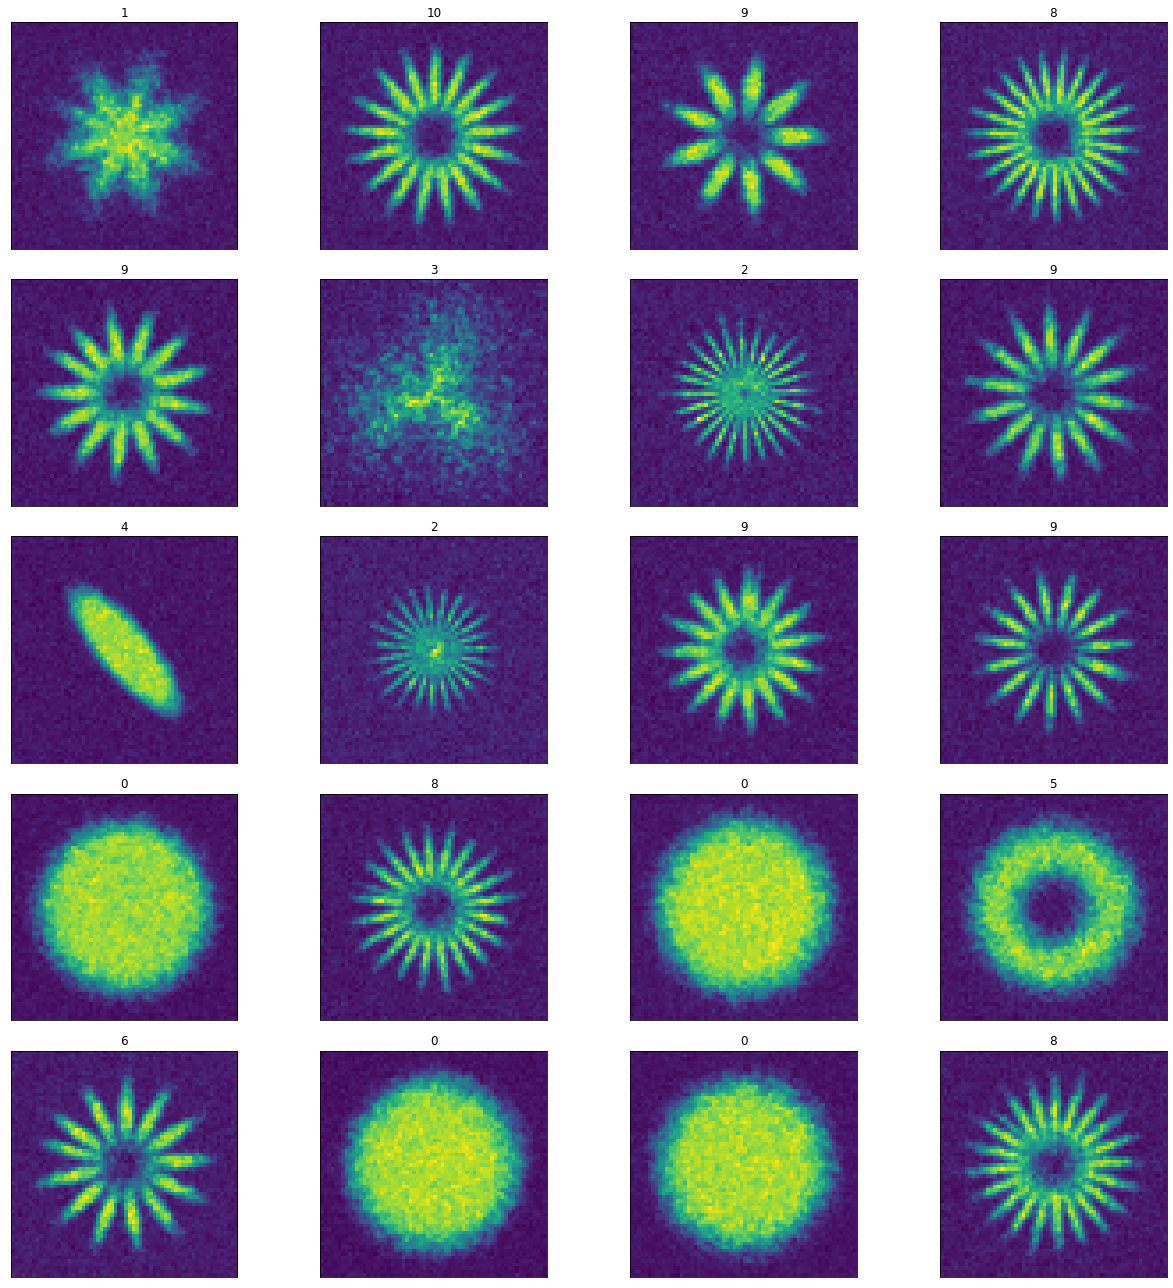

In [8]:
#Visualise the problem
display(problem.describe())
showBlobs(problem.head(20)) 

/Users/mix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Score on training set: 1.0 and on testing: 0.6291666666666667 


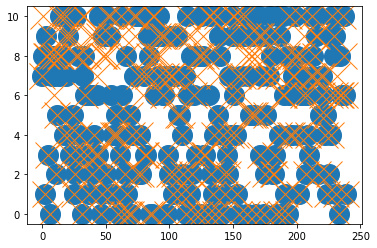

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.stack(problem['raw_data'])
x=x.reshape(x.shape[0],-1) # x as as vector
y=problem['class'].values.reshape(-1,1).flatten().astype(int)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

logreg = LogisticRegression(random_state=0).fit(x_train, y_train)
y_predict = logreg.predict(x_test)
test_set_score = logreg.score(x_test, y_test)
train_set_score = logreg.score(x_train, y_train)
print("Score on training set: {} and on testing: {} ".format(train_set_score,test_set_score))
plt.plot(y_test,'o', markersize=20)
plt.plot(y_predict,'x', markersize=26)
plt.show()